# Beta rozdělení

#### Parametry

* $\alpha \in \mathbb{R}^+$
    * obvyklá interpretace: počet zdarů
* $\beta \in \mathbb{R}^+$
    * obvyklá interpretace: počet nezdarů

#### Momenty

* $E(X) = \frac{\alpha}{\alpha + \beta}$
    * zobecněný poměr, reprezentace pravděpodobnosti binomického jevu
* $Var(X) = \frac{\alpha\beta}{(\alpha + \beta + 1)(\alpha + \beta)^2} \sim \frac{1}{(\alpha + \beta)} $
    * směrodatná odchylka klesá s odmocninou z počtu pozorování $(\alpha + \beta)$




,parameter,value
0,alpha,2
1,beta,7
2,mean,0.22
3,sdev,0.13
4,median,0.20
5,10% — 90%,0.07 — 0.41
6,5% — 95%,0.05 — 0.47
7,1% — 99%,0.02 — 0.59


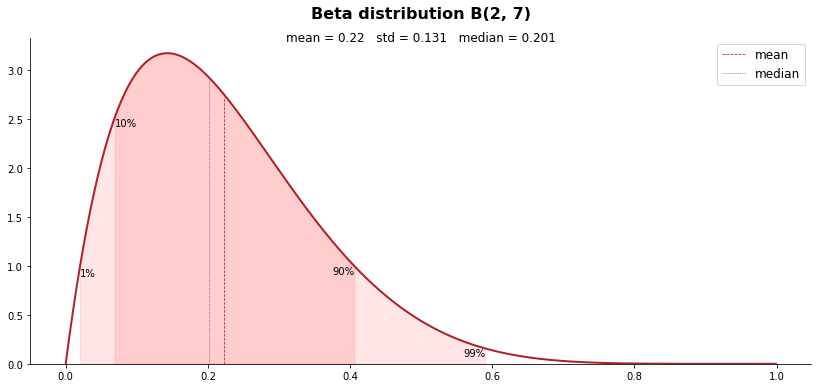

In [5]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def plot_beta(alpha, beta, mean=False, median=False, quantiles=[[0.1,0.9]]):
    x = np.arange(0,1,0.001)
    y = stats.beta.pdf(x, alpha, beta)
    plt.figure(figsize=(14,6))
    g=sns.lineplot(x=x,y=y, color='#AB2328', linewidth = 2)
    g.set(ylim=(0, 3 if alpha + beta < 5 else None))
    g.text(x=0.5, y=1.05, s=f'Beta distribution B({alpha}, {beta})', fontsize=16, weight='bold', ha='center', va='bottom', transform=g.transAxes)
    g.text(x=0.5, y=0.98, s=f'mean = {stats.beta.mean(alpha,beta):.2f}   std = {stats.beta.std(alpha,beta):.3f}   median = {stats.beta.median(alpha,beta):.3f}', fontsize=12, ha='center', va='bottom', transform=g.transAxes)
    if mean: g.plot([stats.beta.mean(alpha,beta)]*2,[0,0.99*stats.beta.pdf(stats.beta.mean(alpha,beta), alpha, beta)],color='#AB2328', linestyle='--', linewidth = .75, label='mean')
    if median: g.plot([stats.beta.median(alpha,beta)]*2,[0,0.99*stats.beta.pdf(stats.beta.median(alpha,beta), alpha, beta)],color='#AB2328', linestyle=':', linewidth = .75, label='median')
    if quantiles:
        for q in quantiles:
            x = np.linspace(stats.beta.ppf(q[0],alpha,beta),stats.beta.ppf(q[1],alpha,beta),100)
            y = stats.beta.pdf(x, alpha, beta)
            g.fill_between(x, 0, y, color="red", alpha=0.1)
            g.text(x[0], y[0], s=f'{q[0]:.0%}', va='top')
            g.text(x[-1], y[-1], s=f'{q[1]:.0%}', ha="right", va='top')
    sns.despine()
    g.legend(loc=f'upper {"left" if alpha > beta else "right"}', fontsize='large')

def summary_beta(alpha, beta):
    return pd.DataFrame(np.array([
        ['alpha', alpha],
        ['beta', beta], 
        ['mean', f'{stats.beta.mean(alpha,beta):.2f}'],
        ['sdev', f'{stats.beta.std(alpha,beta):.2f}'],
        ['median', f'{stats.beta.median(alpha,beta):.2f}'],
        ['10% — 90%', f'{stats.beta.ppf(0.10,alpha,beta):.2f} — {stats.beta.ppf(0.90,alpha,beta):.2f}'],
        ['5% — 95%', f'{stats.beta.ppf(0.05,alpha,beta):.2f} — {stats.beta.ppf(0.95,alpha,beta):.2f}'],
        ['1% — 99%', f'{stats.beta.ppf(0.01,alpha,beta):.2f} — {stats.beta.ppf(0.99,alpha,beta):.2f}'],
    ]), columns = ['parameter', 'value'])
  
    
    
    
alpha, beta = 2,7
    
plot_beta(alpha,beta, mean=True, median=True, quantiles=[[0.1,0.9],[0.01,0.99]])    
summary_beta(alpha,beta)   
